In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [2]:
# Read the data (change this to your file path)
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/df_tfidf_vectorized.csv')  # Change this to the actual path

In [3]:
df.head()

,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0.0,0.0,0.0,0.000000,0.023901,0.0,0.0,0.000000,0.046312,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Positive,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Negative,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Negative,0.0,0.0,0.0,0.015669,0.000000,0.0,0.0,0.027076,0.191413,...,0.0,0.0,0.026004,0.0,0.0,0.121938,0.0,0.0,0.0,0.0


In [4]:
# Convert the label column to a categorical variable if it's not already
df['Label'] = df['Label'].astype('category')

In [5]:
# Prepare the numeric features (Assuming the label column is excluded)
df_numeric = df.drop(columns=['Label'])

In [7]:
# Random Sampling: 10 samples per label (assuming at least 10 per label)
np.random.seed(123)  # Ensure reproducibility
sampled_df = df.groupby('Label').apply(lambda x: x.sample(20)).reset_index(drop=True)
sampled_df.head()

/var/folders/wy/fb319nn12db5rdprbkkf0yqr0000gn/T/ipykernel_66899/2378836608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_df = df.groupby('Label').apply(lambda x: x.sample(20)).reset_index(drop=True)
/var/folders/wy/fb319nn12db5rdprbkkf0yqr0000gn/T/ipykernel_66899/2378836608.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Label').apply(lambda x: x.sample(20)).reset_index(drop=True)


,Label,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,Negative,0.000000,0.0,0.0,0.053170,0.013967,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.051032,0.0,0.0
1,Negative,0.011559,0.0,0.0,0.008787,0.003078,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009512,0.000000,0.0,0.0
2,Negative,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Negative,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Negative,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [8]:
# Extract numeric data after sampling
df_sampled_numeric = sampled_df.drop(columns=['Label'])

In [21]:
df_sampled_numeric.head()

,ab,abb,abilities,ability,able,abroad,absolute,absolutely,abuse,academia,...,youre,youth,youtube,youve,yoy,zealand,zero,zone,zones,zuckerberg
0,0.000000,0.0,0.0,0.053170,0.013967,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.051032,0.0,0.0
1,0.011559,0.0,0.0,0.008787,0.003078,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.009512,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [9]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(df_sampled_numeric)
cosine_sim

array([[1.        , 0.05626273, 0.05578743, ..., 0.12402431, 0.08989897,
        0.09703291],
       [0.05626273, 1.        , 0.02680805, ..., 0.03931637, 0.02325182,
        0.11568902],
       [0.05578743, 0.02680805, 1.        , ..., 0.03388955, 0.02899043,
        0.03913726],
       ...,
       [0.12402431, 0.03931637, 0.03388955, ..., 1.        , 0.0577215 ,
        0.05047234],
       [0.08989897, 0.02325182, 0.02899043, ..., 0.0577215 , 1.        ,
        0.07278009],
       [0.09703291, 0.11568902, 0.03913726, ..., 0.05047234, 0.07278009,
        1.        ]])

In [10]:
# Convert the cosine similarity matrix to a distance matrix (1 - cosine similarity)
cosine_dist = 1 - cosine_sim
cosine_dist

array([[-4.44089210e-16,  9.43737268e-01,  9.44212572e-01, ...,
         8.75975689e-01,  9.10101030e-01,  9.02967087e-01],
       [ 9.43737268e-01,  3.33066907e-16,  9.73191953e-01, ...,
         9.60683634e-01,  9.76748176e-01,  8.84310976e-01],
       [ 9.44212572e-01,  9.73191953e-01,  2.22044605e-16, ...,
         9.66110445e-01,  9.71009566e-01,  9.60862739e-01],
       ...,
       [ 8.75975689e-01,  9.60683634e-01,  9.66110445e-01, ...,
         6.66133815e-16,  9.42278503e-01,  9.49527664e-01],
       [ 9.10101030e-01,  9.76748176e-01,  9.71009566e-01, ...,
         9.42278503e-01,  0.00000000e+00,  9.27219911e-01],
       [ 9.02967087e-01,  8.84310976e-01,  9.60862739e-01, ...,
         9.49527664e-01,  9.27219911e-01,  2.22044605e-16]])

In [22]:
df_cosine_dist = pd.DataFrame(cosine_dist)
df_cosine_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-4.440892e-16,9.437373e-01,9.442126e-01,9.194893e-01,8.380631e-01,0.967697,0.784382,0.959176,0.841931,0.960548,...,0.706588,0.861590,0.961833,0.977928,0.940982,0.820204,0.976855,0.875976,0.910101,0.902967
1,9.437373e-01,3.330669e-16,9.731920e-01,8.194676e-01,9.260106e-01,0.797857,0.899484,0.983552,0.962168,0.958640,...,0.920381,0.856408,0.960639,0.852136,0.955085,0.903199,0.983933,0.960684,0.976748,0.884311
2,9.442126e-01,9.731920e-01,2.220446e-16,9.718711e-01,9.815323e-01,0.982697,0.989955,0.987885,0.973136,0.974343,...,0.961191,0.955176,0.985168,0.984946,0.972830,0.961413,0.987423,0.966110,0.971010,0.960863
3,9.194893e-01,8.194676e-01,9.718711e-01,-8.881784e-16,9.310186e-01,0.959490,0.948829,0.938897,0.921445,0.939948,...,0.937580,0.939481,0.972669,0.966885,0.924998,0.878049,0.987995,0.953014,0.959063,0.913654
4,8.380631e-01,9.260106e-01,9.815323e-01,9.310186e-01,-4.440892e-16,0.967586,0.923112,0.968877,0.949842,0.979051,...,0.910362,0.913528,0.984151,0.986837,0.971829,0.923992,0.989467,0.972615,0.977488,0.952147


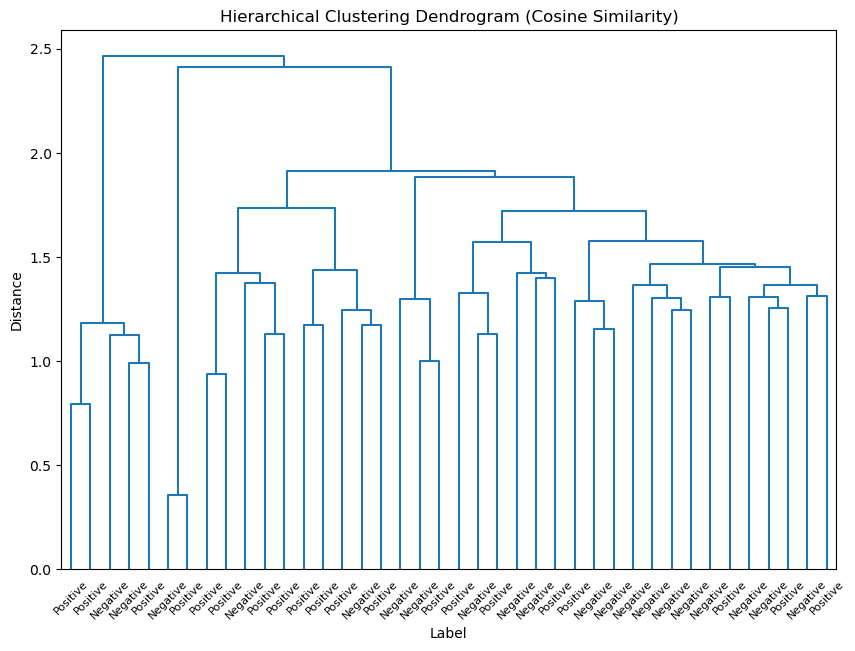

In [19]:
# Perform hierarchical clustering using the linkage function (Ward's method by default)
Z = linkage(cosine_dist, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=sampled_df['Label'].values, color_threshold=0.2)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel('Label')
plt.ylabel('Distance')
plt.show()